# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#turn a list into a dataframe

cities_df = pd.DataFrame (cities,columns=['City Name'])
cities_df


,City Name
0,cairns
1,ushuaia
2,hasaki
3,geraldton
4,atuona
...,...
621,menongue
622,marzuq
623,kargasok
624,tulle


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "q=" + 'city' + "&appid=" + weather_api_key 
print(query_url)


http://api.openweathermap.org/data/2.5/weather?q=city&appid=d3a0e240971d2771b569063435ebd939


In [6]:
weather_response = requests.get(query_url)


In [7]:
weather_json = weather_response.json()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
print(f"The weather API responded with {weather_json}.")

The weather API responded with {'coord': {'lon': 149.13, 'lat': -35.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 278.98, 'feels_like': 276.76, 'temp_min': 277.59, 'temp_max': 280.37, 'pressure': 1026, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 300}, 'clouds': {'all': 90}, 'dt': 1595467447, 'sys': {'type': 1, 'id': 9588, 'country': 'AU', 'sunrise': 1595451913, 'sunset': 1595488461}, 'timezone': 36000, 'id': 2172517, 'name': 'City', 'cod': 200}.


In [9]:
query_url

'http://api.openweathermap.org/data/2.5/weather?q=city&appid=d3a0e240971d2771b569063435ebd939'

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

cities=["Paris", 'jijiga','bridlington',
 'awjilah',
 'itarema','pyaozerskiy',
 'west bay',
 'ranfurly',
 'camacupa',
 'ous',
 'jijiga',
 'bakchar',
 'labuhan',
 'lulea',
 'jieshi',
 'oxford',
 'centralia','cap malheureux',
 'rognan',
 'innisfail',
 'malakal',
 'kyrylivka',
 'xique-xique',
 'shar',
 'ilmajoki',
 'vodnyy',
 'rovaniemi']

lat= []
lon= []
cloudy= []
temp= [] 
humidity= [] 
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    temp.append(response['main']['temp'])
    cloudy.append(response['clouds']['all'])
    lat.append(response['coord']['lat'])
    humidity.append(response['main']['humidity'])
    lon.append(response['coord']['lon'])
print(f"The temperature information received is: {cloudy}")
# create a data frame from cities, lat, and temp

The temperature information received is: [10, 100, 95, 0, 2, 75, 20, 37, 0, 2, 100, 1, 75, 100, 19, 0, 0, 41, 100, 99, 100, 34, 64, 85, 75, 100, 20]


In [13]:
weather_dict = {
    "city": cities,
    "Temperature": temp,
    "Latitude": lat,
    "Longitude": lon,
    "Cloudiness": cloudy,
    "Humidity": humidity}


In [14]:
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,Temperature,Latitude,Longitude,Cloudiness,Humidity
0,Paris,16.02,48.85,2.35,10,59
1,jijiga,16.23,9.35,42.80,100,80
2,bridlington,15.31,54.08,-0.19,95,82
3,awjilah,22.53,29.11,21.29,0,49
4,itarema,24.56,-2.92,-39.92,2,80
5,pyaozerskiy,14.20,65.83,31.17,75,93
6,west bay,29.12,19.37,-81.42,20,70
7,ranfurly,4.44,-45.13,170.10,37,56
8,camacupa,8.40,-12.02,17.48,0,53
9,ous,17.54,60.91,61.52,2,68


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
weather_data.to_csv('weather_data.csv')

In [17]:
weather_data.to_csv('C:\Users\alelawson\Desktop\Pythonstuff/weather_data.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-17-c43277bf14dc>, line 1)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

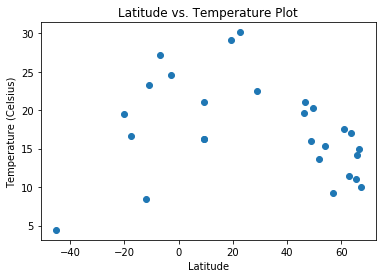

In [21]:
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")
plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")

## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

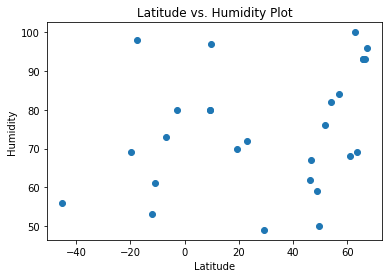

In [22]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

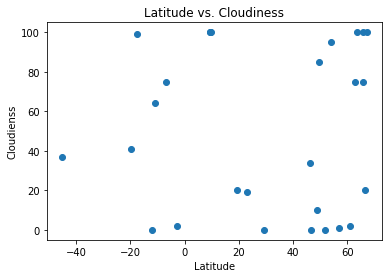

In [23]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudienss")
plt.xlabel("Latitude")

## Latitude vs. Wind Speed Plot

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression